# Imports and Setup

In [4]:
import os

os.chdir(r"/home/yousinator/personal/ChurnSage") #! Change It to to the path on your device or cloud

import pandas as pd
import numpy as np
from base_functions import DataSetInformation
from sklearn.ensemble import RandomForestClassifier
from base_functions import Plotting
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv(
    r"data/actiavation_Aug_Oct2023.csv"
)
metadata = {
    "CO_ID": "Anonymized contract number, unique identifier.",
    "USER_CREATED_BY": "Identifier of the user who created the entry.",
    "MSISDN": "Anonymized mobile phone number, unique.",
    "POS_MSISDN": "Point of Sale ID, where the contract was sold/initiated.",
    "Plan_Name": "Name of the plan subscribed to.",
    "ACTIVE_DATE": "Activation date of the service.",
    "DEACTIVE_DATE": "Deactivation date of the service.",
    "Customer Tenure": "Duration between activation and deactivation/current date.",
    "Tenure Category": "Categorization of tenure into segments (short-term, medium-term, and long-term).",
    "STATUS": "Current status of the line (Active, Suspended, etc.).",
    "Status Reason": "Reason behind the current status.",
    "SEGMENT1": "Customer segmentation category.",
    "SEGMENT2": "Customer segmentation category.",
    "Churn Flag": "Indicator of whether a customer has discontinued the service.",
    "Customer Interaction Score": "Frequency/quality of interactions with customer service.",
    "Loyalty Points": "Points assigned based on tenure, status, and segment.",
    "Data Usage Tier": "Classification based on presumed data usage (3:High, 2:Medium, 1:Low).",
    "Customer Segment Change Flag": "Indicates if a customer changed segments.",
    "DISTRIBUTER": "Entity/shop responsible for service distribution or activation.",
}

# EDA

In [6]:
df

,CO_ID,USER_CREATED_BY,MSISDN,POS_MSISDN,DISTRIBUTER,Plan_Name,ACTIVE_DATE,DEACTIVE_DATE,Customer Tenure,Tenure Category,STATUS,Status Reason,SEGMENT1,SEGMENT2,Churn Flag,Customer Interaction Score,Loyalty Points,Data Usage Tier,Customer Segment Change Flag
0,31154967,BJNN1810,891476116,ORG3448,BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTF...,Basic Orange Plan,10/5/2023,NaN,88,NaN,Hard Suspended,Violation of terms,Prepaid,Residential,1,3,48,1.0,TRUE
1,31719208,TTP.PNBR.BLTHBLHBNBF,891433210,NaN,FJFLDTBLFT,Governorates 10,9/28/2023,NaN,95,Medium-term,Active,NaN,Postpaid,PRO,1,7,65,3.0,TRUE
2,30566993,BJNN1810,882740023,NaN,FRBNDHJTF - TBFFXBZ 7TH DJRDLF,Family Orange Plan 10,9/19/2023,NaN,104,Medium-term,Active,NaN,Prepaid,PRO,1,6,65,2.0,TRUE
3,31654015,DPNB1876,529853159,NaN,FNTFRPRJTF TBLFT TTPDL,Orange 90,9/13/2023,10/22/2023,39,Short-term,Deactive,Service Quality,Postpaid,Corporate,1,9,73,NaN,TRUE
4,31237322,DPNB1876,883224490,NaN,FNTFRPRJTF TBLFT TTPDL,Orange 60,8/10/2023,8/28/2023,18,Short-term,Deactive,Lack of Usage,Postpaid,Corporate,1,5,10,NaN,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30219,30425599,BJNN1810,891817314,ORG3312,HPLDFN NBRL,Premium Orange Plan,8/9/2023,11/17/2023,100,Medium-term,Deactive,Contract Ended,Prepaid,Residential,1,6,30,NaN,TRUE
30220,31652227,DPNB1876,529853013,NaN,FNTFRPRJTF TBLFT TTPDL,Orange 90,9/12/2023,10/22/2023,40,Short-term,Deactive,Moved,Postpaid,Corporate,1,6,54,NaN,FALSE
30221,30807259,BJNN1810,887997557,ORG4071,JNTFRNBL DFPBRTNFNTT,Traveler's Plan,8/20/2023,NaN,134,Long-term,Hard suspended,Fraudulent activity,Prepaid,Residential,0,7,65,1.0,TRUE
30222,31265597,BJNN1810,888984949,ORG4193,DJRFDT TVPPPRT,Family Orange Plan 10,10/12/2023,NaN,81,Short-term,Soft suspended,Service upgrade,Prepaid,PRO,0,8,55,1.0,FALSE


In [7]:
info = DataSetInformation(df)

info.dataframe_summary(metadata)

### Shape:

(30224, 19)

### Columns and Metadata:

,Data Type,Null Values,Precentage of Nulls,Description
CO_ID,int64,0,0.0,"Anonymized contract number, unique identifier."
USER_CREATED_BY,object,101,0.3,Identifier of the user who created the entry.
MSISDN,int64,0,0.0,"Anonymized mobile phone number, unique."
POS_MSISDN,object,19571,64.8,"Point of Sale ID, where the contract was sold/initiated."
DISTRIBUTER,object,1805,6.0,Entity/shop responsible for service distribution or activation.
Plan_Name,object,0,0.0,Name of the plan subscribed to.
ACTIVE_DATE,object,0,0.0,Activation date of the service.
DEACTIVE_DATE,object,20068,66.4,Deactivation date of the service.
Customer Tenure,int64,0,0.0,Duration between activation and deactivation/current date.
Tenure Category,object,295,1.0,"Categorization of tenure into segments (short-term, medium-term, and long-term)."


### Duplicated Rows:

,Duplicated Rows Count
Total,427


## Categorical EDA

In [8]:
info.categorical_summary()

### Categorical Columns Summary:

,Column,Unique Values Count,Top Value,Top Value Percentage
0,USER_CREATED_BY,631,BJNN1810,51.33%
1,POS_MSISDN,156,ORG2464,0.85%
2,DISTRIBUTER,151,FNTFRPRJTF TBLFT TTPDL,22.58%
3,Plan_Name,34,Orange 90,19.80%
4,ACTIVE_DATE,92,9/13/2023,8.95%
5,DEACTIVE_DATE,114,10/22/2023,26.89%
6,Tenure Category,6,Short-term,45.02%
7,STATUS,6,Deactive,33.60%
8,Status Reason,18,Violation of terms,7.02%
9,SEGMENT1,8,Prepaid,59.22%


### Column: Tenure Category

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Short-term,13475,45.023222
1,Long-term,8840,29.536570
2,Medium-term,6994,23.368639
3,Short,298,0.995690
4,Medium,186,0.621471
5,Long,136,0.454409


---

### Column: STATUS

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Deactive,10156,33.602435
1,Active,9160,30.307041
2,Hard suspended,5653,18.703679
3,Soft suspended,4964,16.424034
4,Hard Suspended,153,0.506220
5,Soft Suspended,138,0.456591


---

### Column: Status Reason

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Violation of terms,1479,7.021458
1,Illegal usage,1446,6.864793
2,Fraudulent activity,1445,6.860046
3,Non-payment,1436,6.817319
4,Document verification,1284,6.095708
5,Service upgrade,1281,6.081466
6,Technical issue,1272,6.038739
7,Customer request,1265,6.005507
8,Network Issues,1058,5.022788
9,Personal Reasons,1035,4.913597


---

### Column: SEGMENT1

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Prepaid,17898,59.217840
1,Postpaid,12228,40.457914
2,Prepaid100,44,0.145580
3,5Postpaid,24,0.079407
4,Postpaid300,13,0.043012
5,Post60paid,8,0.026469
6,Pre400paid,7,0.023160
7,5Prepaid,2,0.006617


---

### Column: SEGMENT2

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Residential,17197,56.898491
1,Corporate,8475,28.040630
2,PRO,4552,15.060879


---

### Column: Customer Segment Change Flag

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,TRUE,21843,72.270381
1,FALSE,7402,24.490471
2,1,726,2.402065
3,0,253,0.837083


---

### EDA Plots

/home/yousinator/personal/ChurnSage/base_functions/plotting.py:66: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/yousinator/.cache/pypoetry/virtualenvs/churnsage-9N5ssJVD-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


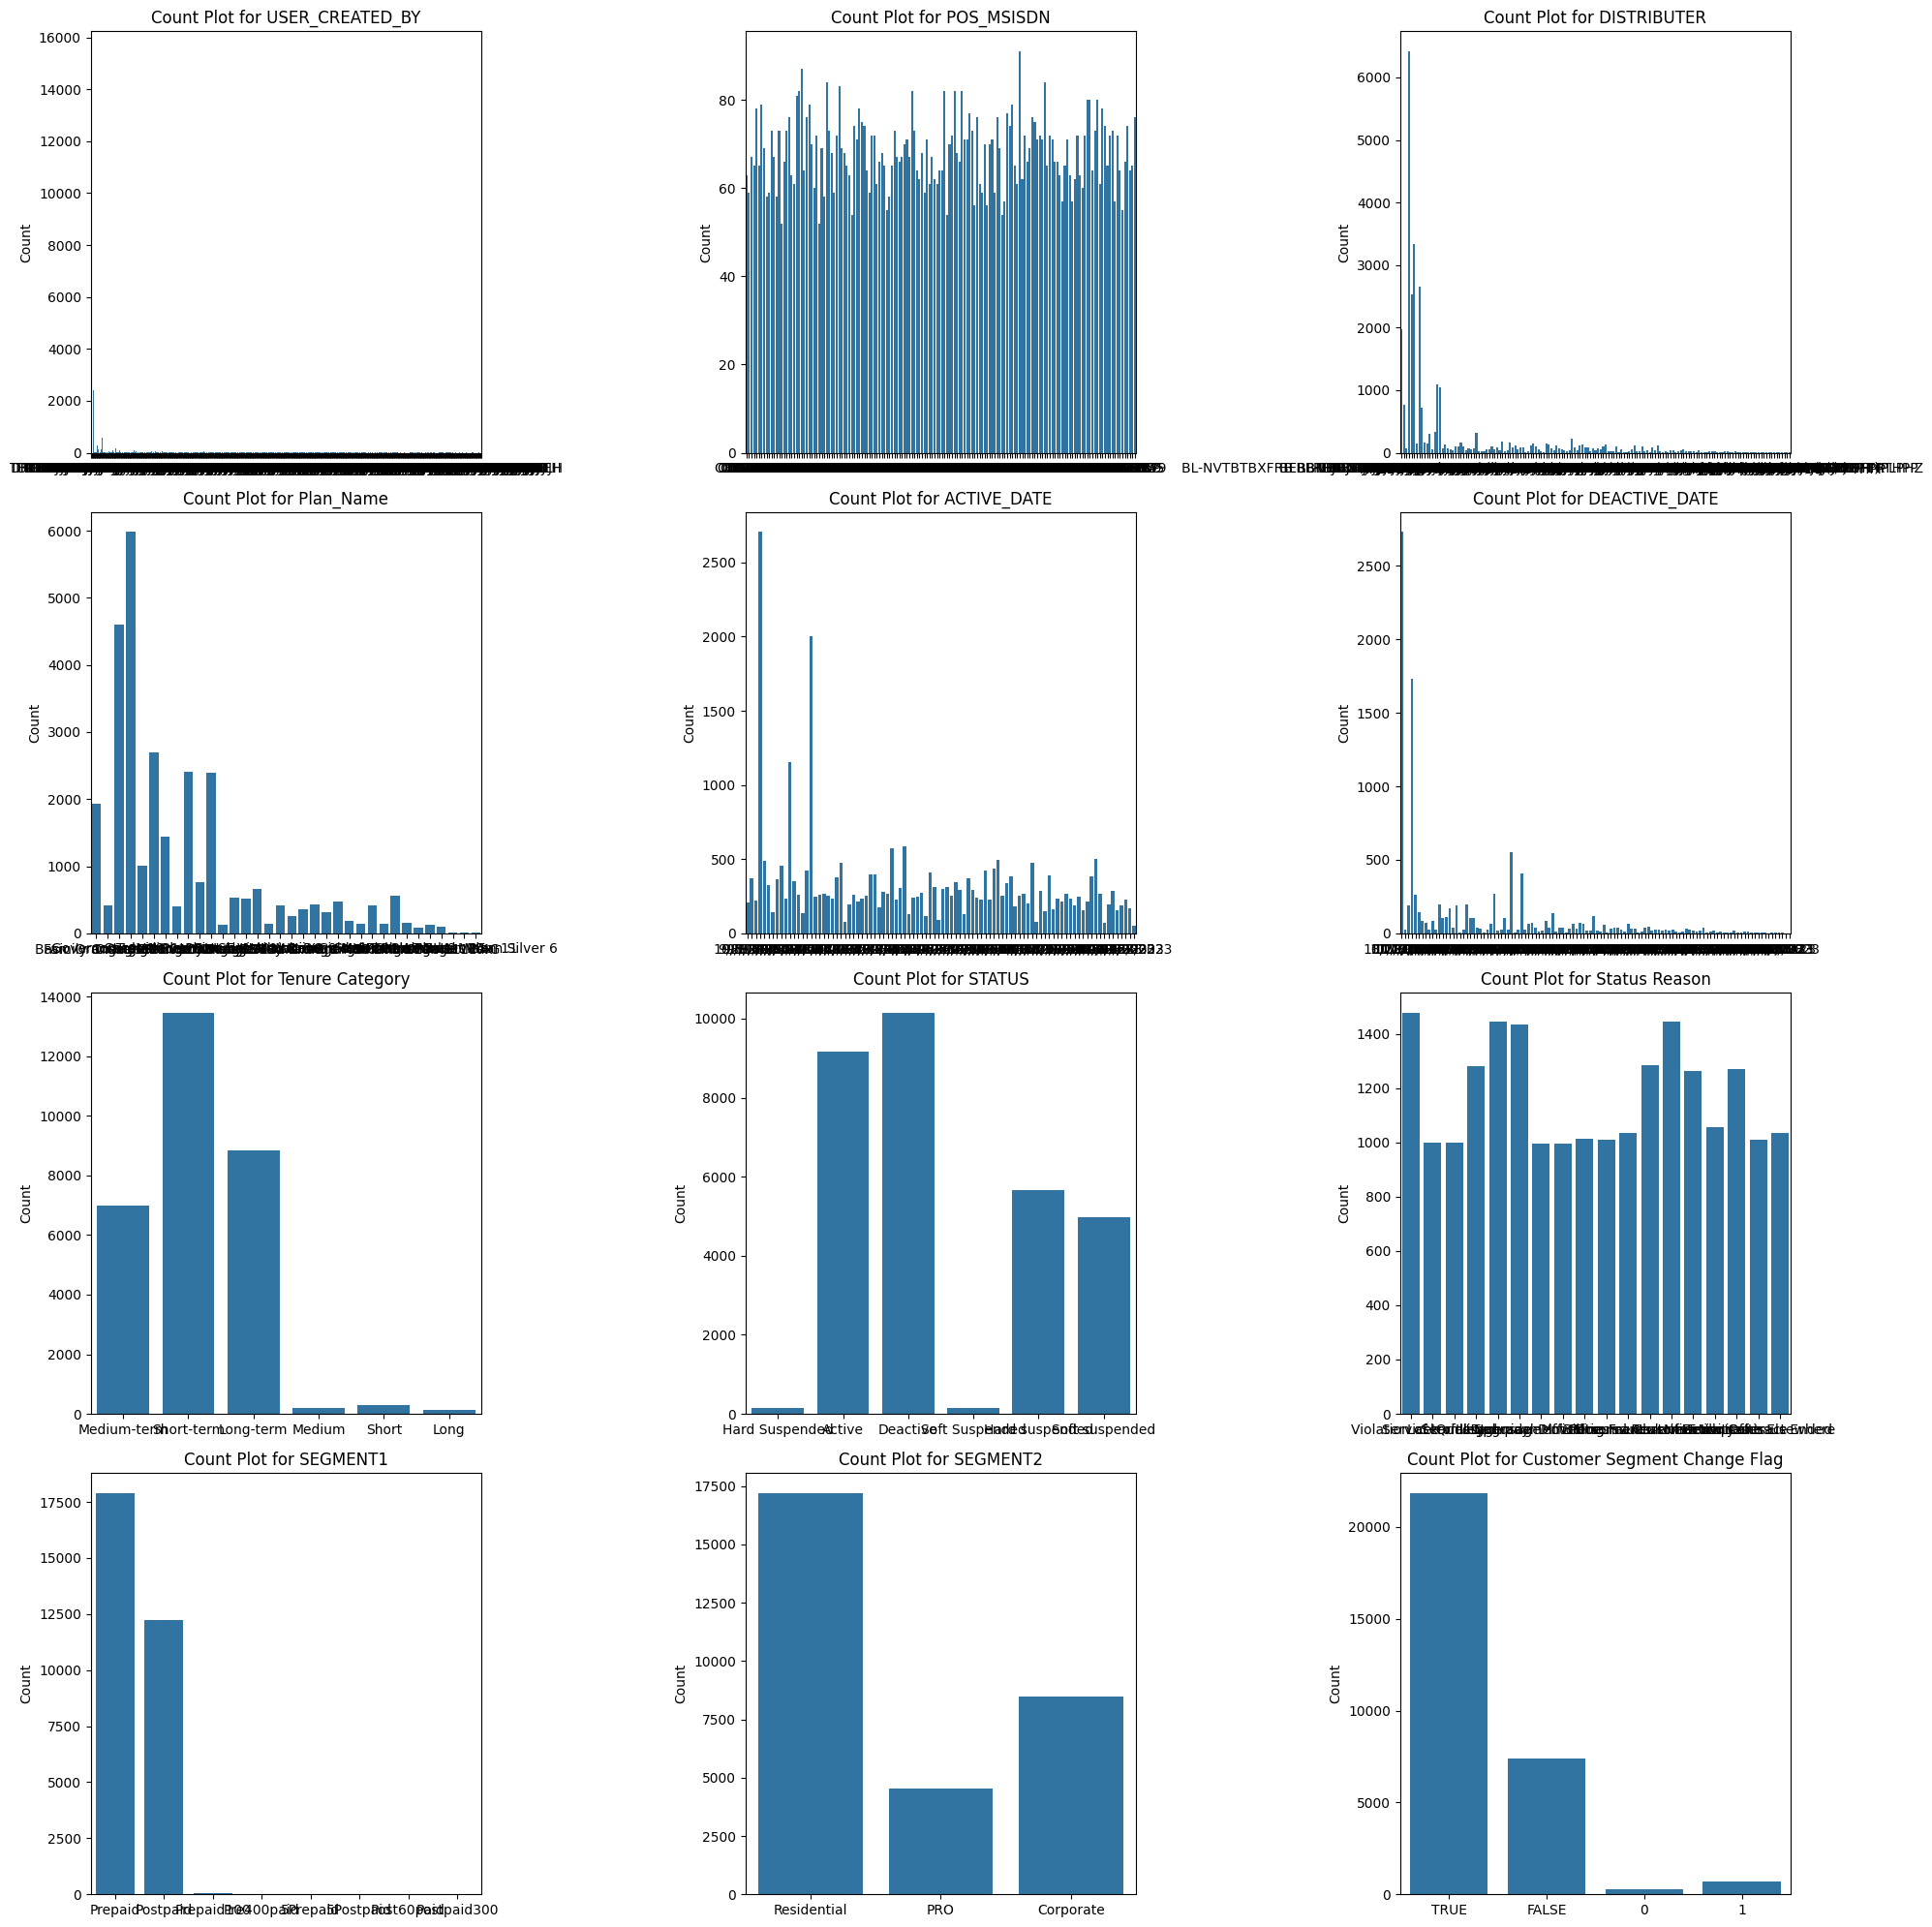

In [9]:
plotting = Plotting(df)

plotting.draw_categorical_plots()

## Numerical EDA

### Numerical Columns Statistical Summary:

,CO_ID,MSISDN,Customer Tenure,Churn Flag,Customer Interaction Score,Loyalty Points,Data Usage Tier
Mean,3.113007e+07,8.137069e+08,85.565345,0.348729,6.249471,60.510720,1.925912
Median,3.128571e+07,8.873348e+08,93.000000,0.000000,6.000000,65.000000,2.000000
Mode,3.165295e+07,8.891247e+08,39.000000,0.000000,5.000000,65.000000,1.000000
Std Dev,8.696344e+05,1.446536e+08,45.325885,0.476576,2.106415,19.477011,0.919454
Variance,7.562639e+11,2.092465e+16,2054.435858,0.227125,4.436985,379.353953,0.845395
Range,2.199540e+07,3.628971e+08,153.000000,1.000000,9.000000,80.000000,2.000000
Min,9.896667e+06,5.293357e+08,0.000000,0.000000,1.000000,10.000000,1.000000
Max,3.189207e+07,8.922328e+08,153.000000,1.000000,10.000000,90.000000,3.000000


### Correlation Matrix:

,CO_ID,MSISDN,Customer Tenure,Churn Flag,Customer Interaction Score,Loyalty Points,Data Usage Tier
CO_ID,1.000000,-0.284738,-0.392159,0.252989,-0.066906,-0.073519,0.365048
MSISDN,-0.284738,1.000000,0.213791,-0.273508,0.061040,0.024270,-0.347039
Customer Tenure,-0.392159,0.213791,1.000000,-0.740729,0.130002,0.440359,-0.127667
Churn Flag,0.252989,-0.273508,-0.740729,1.000000,-0.138676,-0.356069,0.028547
Customer Interaction Score,-0.066906,0.061040,0.130002,-0.138676,1.000000,0.094002,-0.072489
Loyalty Points,-0.073519,0.024270,0.440359,-0.356069,0.094002,1.000000,0.287512
Data Usage Tier,0.365048,-0.347039,-0.127667,0.028547,-0.072489,0.287512,1.000000


### Correlation Matrix Heatmap:

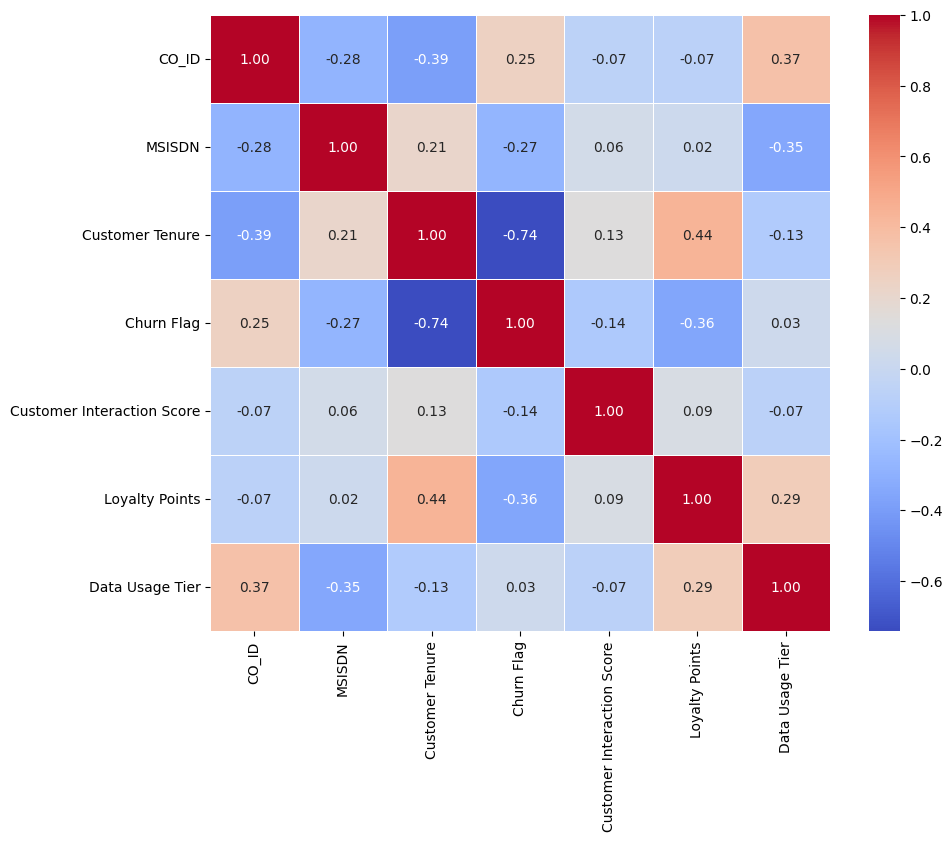

In [10]:
info.numerical_summary()

### Numerical Plots

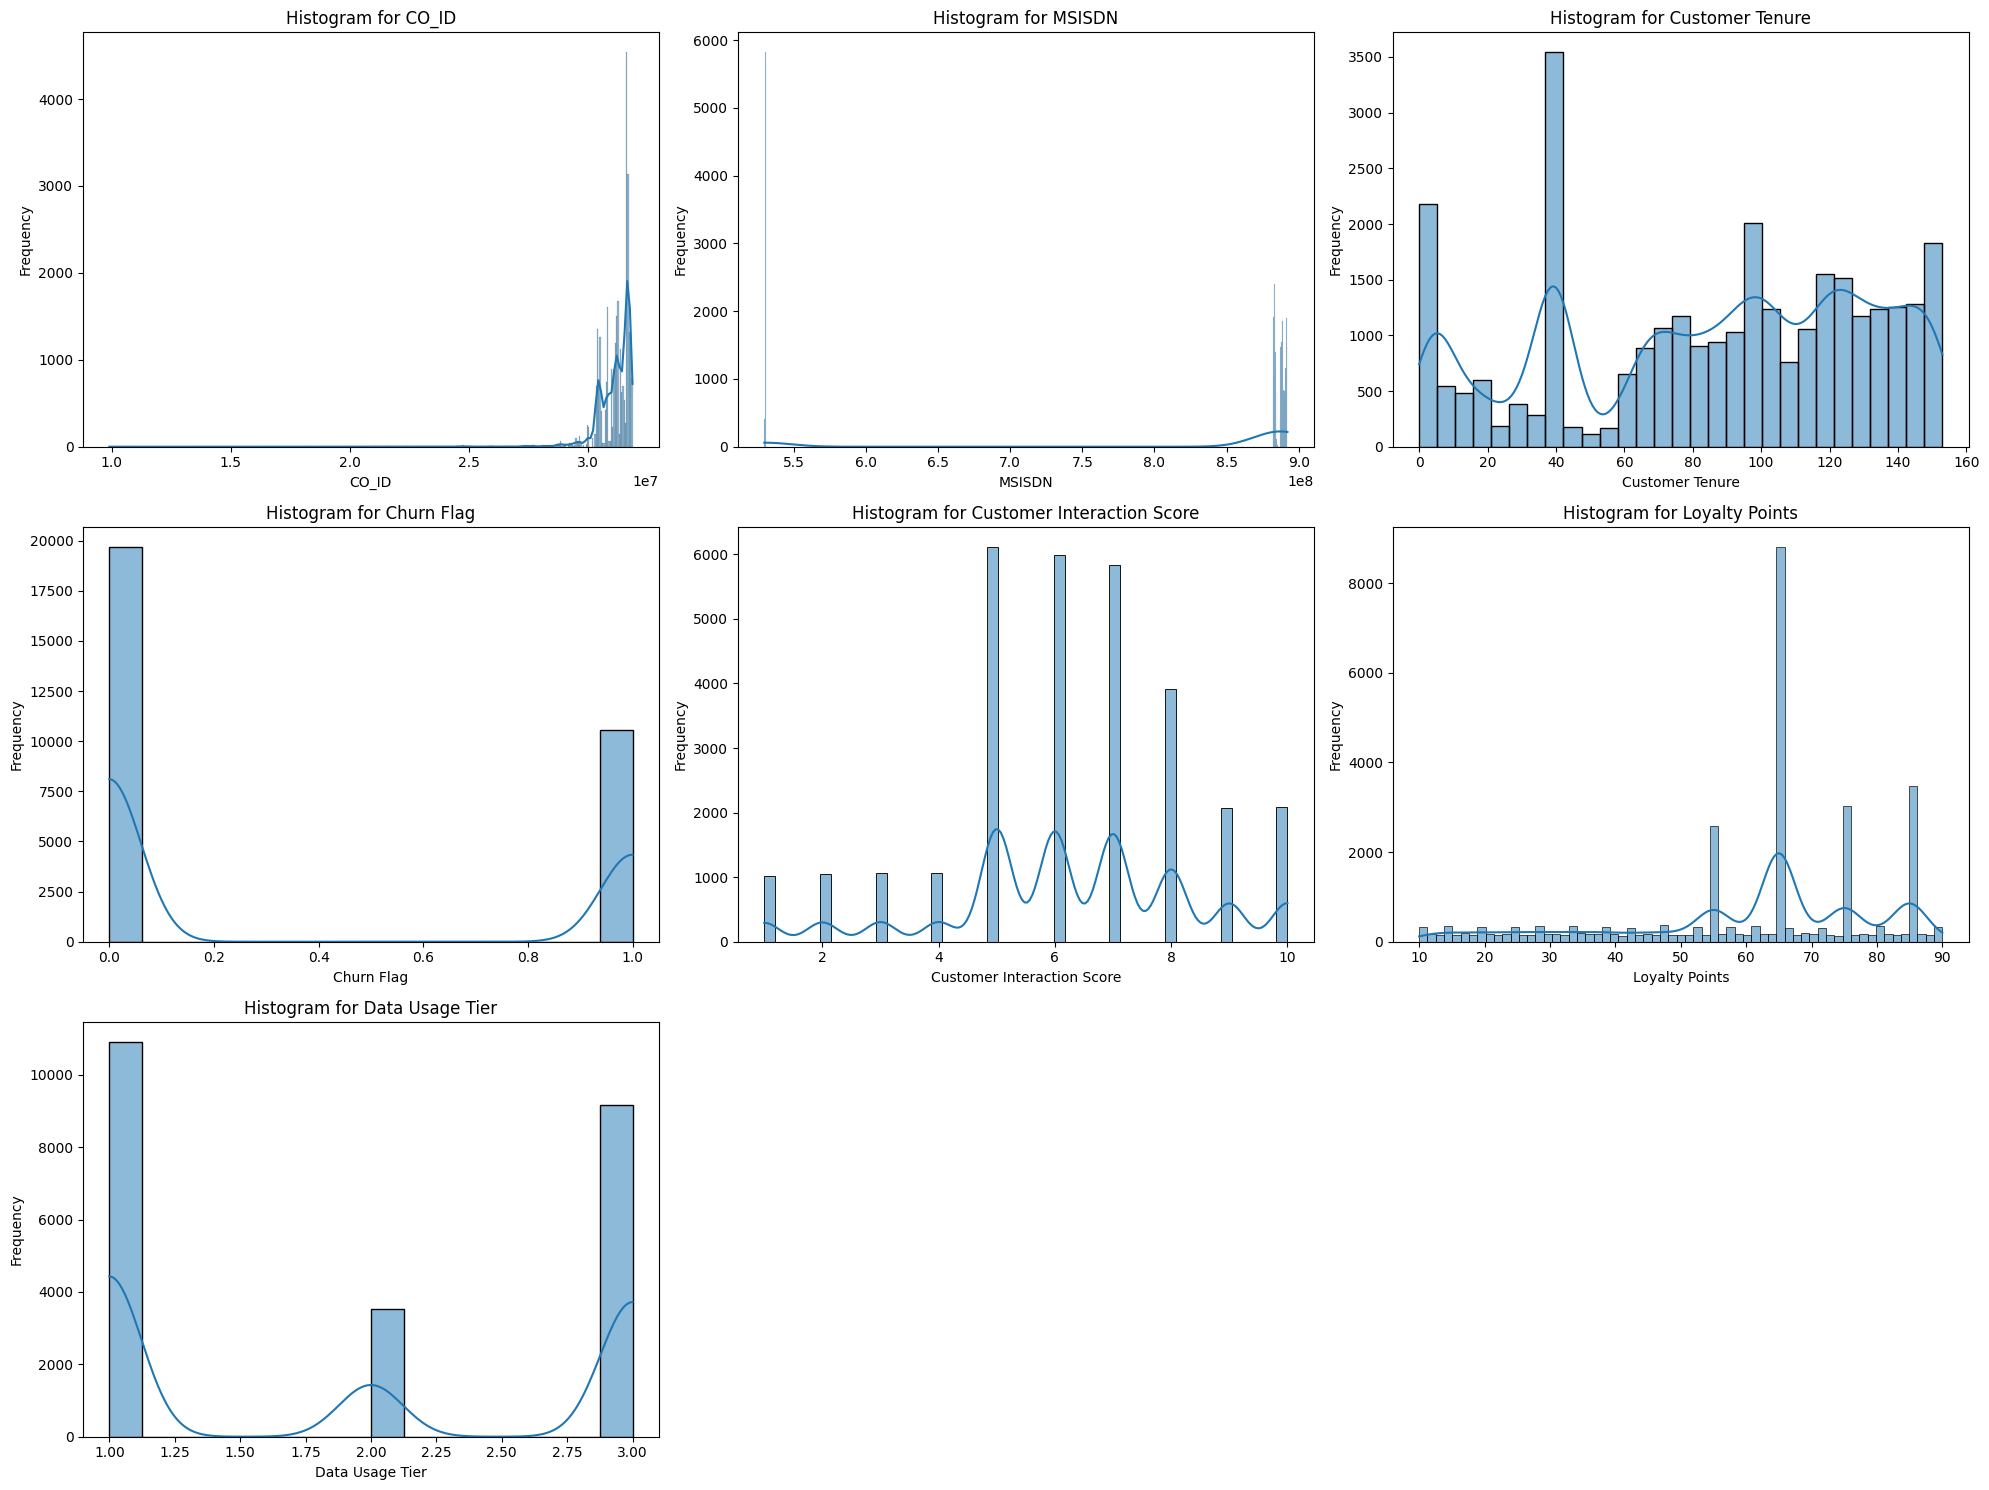

In [11]:
plotting.draw_numerical_plots()

# Data Cleaning

## Dropping Columns

## Data Suitability

### To Int64

In [12]:
#! These are Classes, so they have to be integers.
df["Data Usage Tier"] = df["Data Usage Tier"].astype("Int64")

### Dates

In [13]:
df["ACTIVE_DATE"] = pd.to_datetime(df["ACTIVE_DATE"], format="%m/%d/%Y")
df["DEACTIVE_DATE"] = pd.to_datetime(df["DEACTIVE_DATE"], format="%m/%d/%Y")

## Dropping Duplicates

In [14]:
df.drop_duplicates(inplace=True)

## Changing Column Namings

In [15]:
keep = ["MSISDN", "POS_MSISDN", "CO_ID"]
df.columns = [
    col.replace("_", " ").title() if col not in keep else col for col in df.columns
]


In [16]:
df.columns

Index(['CO_ID', 'User Created By', 'MSISDN', 'POS_MSISDN', 'Distributer',
       'Plan Name', 'Active Date', 'Deactive Date', 'Customer Tenure',
       'Tenure Category', 'Status', 'Status Reason', 'Segment1', 'Segment2',
       'Churn Flag', 'Customer Interaction Score', 'Loyalty Points',
       'Data Usage Tier', 'Customer Segment Change Flag'],
      dtype='object')

## Column Values Cleaning

### Tenure Category

In [17]:
tenure = {"Short": "Short-term", "Medium": "Medium-term", "Long": "Long-term"}

df["Tenure Category"] = df["Tenure Category"].replace(tenure)

### Status

In [18]:
df["Status"] = df["Status"].str.title()

### Segment1

In [19]:
df["Segment1"] = df["Segment1"].str.replace("[0-9]", "", regex=True)

### Customer Segment Change Flag

In [20]:
change = {"1": "TRUE", "0": "FALSE"}

df["Customer Segment Change Flag"] = df["Customer Segment Change Flag"].replace(change)

## FIlling Nulls

### User Created

In [21]:
df.groupby(["Status", "Churn Flag"])["User Created By"].agg(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan
)

Status          Churn Flag
Active          0             BJNN1810
                1             BJNN1810
Deactive        0             DPNB1876
                1             DPNB1876
Hard Suspended  0             BJNN1810
                1             BJNN1810
Soft Suspended  0             BJNN1810
                1             BJNN1810
Name: User Created By, dtype: object

In [22]:
def fill_mode(x):
    mode = x.mode()
    return mode[0] if not mode.empty else np.nan


# Group by 'STATUS' and 'Churn Flag', then fill missing 'USER_CREATED_BY' values
df["User Created By"] = df.groupby(["Status", "Churn Flag"])[
    "User Created By"
].transform(lambda x: fill_mode(x) if x.isna().any() else x)

### Distributer

In [23]:
df.groupby(["Segment2", "Plan Name"])["Distributer"].agg(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan
)

Segment2     Plan Name            
Corporate    Business Plan                         FNTFRPRJTF TBLFT TTPDL
             Economy Plan                          FNTFRPRJTF TBLFT TTPDL
             Family Orange Plan 10                 FNTFRPRJTF TBLFT TTPDL
             Governorates 10                       FNTFRPRJTF TBLFT TTPDL
             Governorates 25                       FNTFRPRJTF TBLFT TTPDL
                                                     ...                 
Residential  Traveler's Plan                           BJRPPRT TFRNJNBL 1
             Unknown                                     HPNF BBDL PFFJDF
             Visitors' Line           BLBBTHFR FPR TRBDF BND DJTTRJBVTJPN
             Visitors’ Line Extra                        HPLDFN NBRL HPPT
             YO 9 Max                                JNTFRNBL DFPBRTNFNTT
Name: Distributer, Length: 69, dtype: object

In [24]:
df["Distributer"] = df.groupby(["Segment2", "Plan Name"])["Distributer"].transform(
    lambda x: fill_mode(x) if x.isna().any() else x
)

### Deactivate Date

In [25]:
df["Deactive Date"] = df["Active Date"] + pd.to_timedelta(
    df["Customer Tenure"], unit="d"
)

#! Source for to_timedelta() https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html

### Tenure Category

In [26]:
tenure_category = df.groupby("Tenure Category")["Customer Tenure"].max().sort_values()
tenure_category


Tenure Category
Short-term      86
Medium-term    119
Long-term      153
Name: Customer Tenure, dtype: int64

In [27]:
for category, max_tenure in tenure_category.items():
    condition = df["Customer Tenure"] <= max_tenure
    df.loc[condition, "Tenure Category"] = df.loc[condition, "Tenure Category"].fillna(
        category
    )

long_term_condition = df["Customer Tenure"] >= 153
df.loc[long_term_condition, "Tenure Category"] = df.loc[
    long_term_condition, "Tenure Category"
].fillna("Long-term")

### Status Reason

In [28]:
condition = df["Status"] == "Active"
df.loc[condition, "Status Reason"] = df.loc[condition, "Status Reason"].fillna(
    "Good Service"
)

### Data Usage Tier

In [29]:
df.groupby(["Segment1", "Segment2", "Plan Name"])["Data Usage Tier"].agg(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan
)

Segment1  Segment2     Plan Name           
Postpaid  Corporate    Business Plan           3
                       Economy Plan            3
                       Governorates 10         2
                       Governorates 25         2
                       Humat Al Watan 10       3
                                              ..
Prepaid   Residential  Student Plan 9          1
                       Traveler's Plan         1
                       Visitors' Line          1
                       Visitors’ Line Extra    3
                       YO 9 Max                1
Name: Data Usage Tier, Length: 69, dtype: Int64

In [30]:
df["Data Usage Tier"] = df.groupby(["Segment2", "Segment2", "Plan Name"])[
    "Data Usage Tier"
].transform(lambda x: fill_mode(x) if x.isna().any() else x)

In [31]:
info.categorical_summary()

### Categorical Columns Summary:

,Column,Unique Values Count,Top Value,Top Value Percentage
0,User Created By,62,BJNN1810,66.43%
1,POS_MSISDN,156,ORG2464,0.85%
2,Distributer,145,FNTFRPRJTF TBLFT TTPDL,27.50%
3,Plan Name,34,Orange 90,19.88%
4,Tenure Category,3,Short-term,45.86%
5,Status,4,Deactive,33.80%
6,Status Reason,19,Good Service,30.18%
7,Segment1,2,Prepaid,59.41%
8,Segment2,3,Residential,57.11%
9,Customer Segment Change Flag,2,TRUE,74.62%


### Column: Tenure Category

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Short-term,13664,45.856965
1,Long-term,8817,29.590227
2,Medium-term,7316,24.552807


---

### Column: Status

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Deactive,10071,33.798705
1,Active,8992,30.177535
2,Hard Suspended,5764,19.344229
3,Soft Suspended,4970,16.679531


---

### Column: Status Reason

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Good Service,8992,30.177535
1,Violation of terms,1464,4.913246
2,Fraudulent activity,1439,4.829345
3,Illegal usage,1436,4.819277
4,Non-payment,1425,4.782361
5,Service upgrade,1255,4.211833
6,Document verification,1253,4.205121
7,Technical issue,1239,4.158137
8,Customer request,1223,4.104440
9,Network Issues,1055,3.540625


---

### Column: Segment1

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Prepaid,17703,59.412021
1,Postpaid,12094,40.587979


---

### Column: Segment2

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Residential,17017,57.109776
1,Corporate,8357,28.046448
2,PRO,4423,14.843776


---

### Column: Customer Segment Change Flag

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,TRUE,22235,74.621606
1,FALSE,7562,25.378394


---

In [32]:
info.dataframe_summary()

### Shape:

(29797, 19)

### Columns and Metadata:

,Data Type,Null Values,Precentage of Nulls
CO_ID,int64,0,0.0
User Created By,object,0,0.0
MSISDN,int64,0,0.0
POS_MSISDN,object,19226,64.5
Distributer,object,0,0.0
Plan Name,object,0,0.0
Active Date,datetime64[ns],0,0.0
Deactive Date,datetime64[ns],0,0.0
Customer Tenure,int64,0,0.0
Tenure Category,object,0,0.0


### Duplicated Rows:

,Duplicated Rows Count
Total,30


### POS_MSISDN

In [33]:
train_data = df.dropna(
    subset=["POS_MSISDN"]
).copy()  # Make a copy to avoid SettingWithCopyWarning
predict_data = df[df["POS_MSISDN"].isnull()].copy()  # Make a copy here as well

# Combine, encode, then split the 'Distributer' column to ensure all labels are known
all_distributers = pd.concat(
    [train_data["Distributer"], predict_data["Distributer"]], ignore_index=True
)

le_dist = LabelEncoder()
all_distributers_encoded = le_dist.fit_transform(all_distributers)

train_data.loc[:, "Distributer_Encoded"] = all_distributers_encoded[: len(train_data)]
predict_data.loc[:, "Distributer_Encoded"] = all_distributers_encoded[len(train_data) :]

# Encode 'POS_MSISDN' for training
le_pos = LabelEncoder()
train_data.loc[:, "POS_MSISDN_Encoded"] = le_pos.fit_transform(train_data["POS_MSISDN"])

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(train_data[["Distributer_Encoded"]], train_data["POS_MSISDN_Encoded"])

# Predict the missing values
predicted_pos_encoded = model.predict(predict_data[["Distributer_Encoded"]])
predicted_pos = le_pos.inverse_transform(predicted_pos_encoded)

# Update the original DataFrame with the predicted values
df.loc[df["POS_MSISDN"].isnull(), "POS_MSISDN"] = predicted_pos

# Removing Uneeded Model Columns

In [34]:
df.drop(
    [
        "CO_ID",
        "MSISDN", "Active Date",
        "Deactive Date",
        "User Created By"
    ],
    axis=1,
    inplace=True
)

In [35]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].str.strip()

In [36]:
info.categorical_summary()

### Categorical Columns Summary:

,Column,Unique Values Count,Top Value,Top Value Percentage
0,POS_MSISDN,156,ORG3592,29.78%
1,Distributer,142,FNTFRPRJTF TBLFT TTPDL,27.50%
2,Plan Name,34,Orange 90,19.88%
3,Tenure Category,3,Short-term,45.86%
4,Status,4,Deactive,33.80%
5,Status Reason,19,Good Service,30.18%
6,Segment1,2,Prepaid,59.41%
7,Segment2,3,Residential,57.11%
8,Customer Segment Change Flag,2,TRUE,74.62%


### Column: Tenure Category

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Short-term,13664,45.856965
1,Long-term,8817,29.590227
2,Medium-term,7316,24.552807


---

### Column: Status

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Deactive,10071,33.798705
1,Active,8992,30.177535
2,Hard Suspended,5764,19.344229
3,Soft Suspended,4970,16.679531


---

### Column: Status Reason

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Good Service,8992,30.177535
1,Violation of terms,1464,4.913246
2,Fraudulent activity,1439,4.829345
3,Illegal usage,1436,4.819277
4,Non-payment,1425,4.782361
5,Service upgrade,1255,4.211833
6,Document verification,1253,4.205121
7,Technical issue,1239,4.158137
8,Customer request,1223,4.104440
9,Network Issues,1055,3.540625


---

### Column: Segment1

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Prepaid,17703,59.412021
1,Postpaid,12094,40.587979


---

### Column: Segment2

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Residential,17017,57.109776
1,Corporate,8357,28.046448
2,PRO,4423,14.843776


---

### Column: Customer Segment Change Flag

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,TRUE,22235,74.621606
1,FALSE,7562,25.378394


---

In [37]:
df.drop_duplicates(inplace=True)

In [38]:

df.to_csv(r"data/clean_churn_data.csv",index=False, encoding='utf-8-sig')
